In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df24 = pd.read_excel('.\data\/HIST_PAINEL_COVIDBR_24jun2020.xlsx')
df30 = pd.read_excel('.\data\/HIST_PAINEL_COVIDBR_30jun2020.xlsx')

In [3]:
cat_dia_semana = pd.CategoricalDtype(categories=['dom', 'seg', 'ter', 'qua', 'qui', 'sex', 'sab'], ordered=True)
df24['dia_semana'] = df24['data'].dt.dayofweek
df24['dia_semana_nm'] = df24['dia_semana'].replace({0:'seg', 1: 'ter', 2:'qua', 3:'qui', 4:'sex', 5:'sab', 6:'dom'}).astype(cat_dia_semana)

df30['dia_semana'] = df30['data'].dt.dayofweek
df30['dia_semana_nm'] = df30['dia_semana'].replace({0:'seg', 1: 'ter', 2:'qua', 3:'qui', 4:'sex', 5:'sab', 6:'dom'}).astype(cat_dia_semana)

In [4]:
fltr = df24['estado'] == 'MS'
df24 = df24.loc[fltr, :]
fltr = df24['municipio'] == 'Dourados'
df24 = df24.loc[fltr, :]

In [5]:
fltr = df30['estado'] == 'MS'
df30 = df30.loc[fltr, :]
fltr = df30['municipio'] == 'Dourados'
df30 = df30.loc[fltr, :]

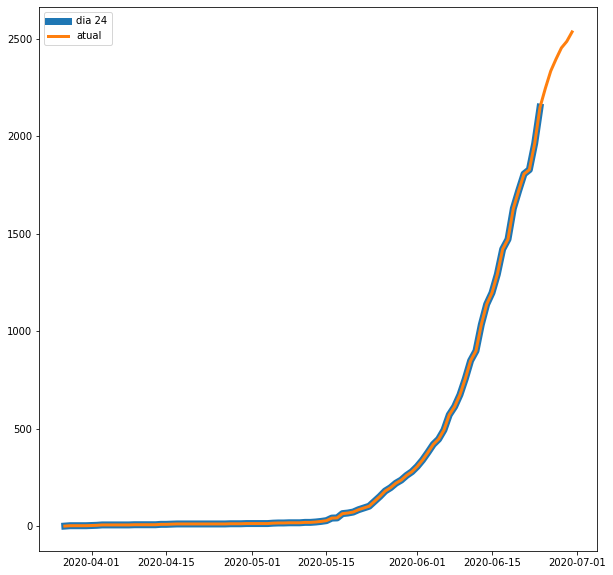

In [6]:
fig = plt.figure(1, figsize=(10,10))
plt.plot(df24['data'] , df24['casosAcumulado'],  label ='dia 24' ,linewidth=7)
plt.plot(df30['data'] , df30['casosAcumulado'],  label ='atual' , linewidth=3)
plt.legend()


In [7]:
df24['CA_LOG'] =   np.log10(df24['casosAcumulado'])
df30['CA_LOG'] =   np.log10(df30['casosAcumulado'])

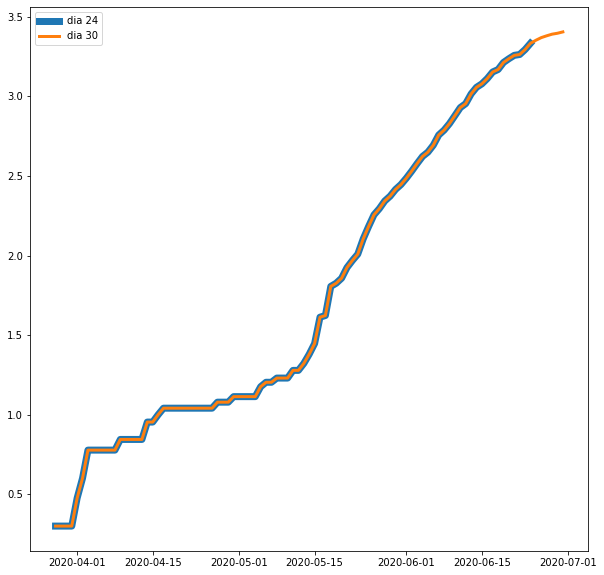

In [8]:
fig = plt.figure(1, figsize=(10,10))
plt.plot(df24['data'] , df24['CA_LOG'],  label ='dia 24' ,linewidth=7)
plt.plot(df30['data'] , df30['CA_LOG'],  label ='dia 30' , linewidth=3)
plt.legend()

(array([737516., 737530., 737546., 737560., 737577., 737591., 737607.]),
 <a list of 7 Text xticklabel objects>)

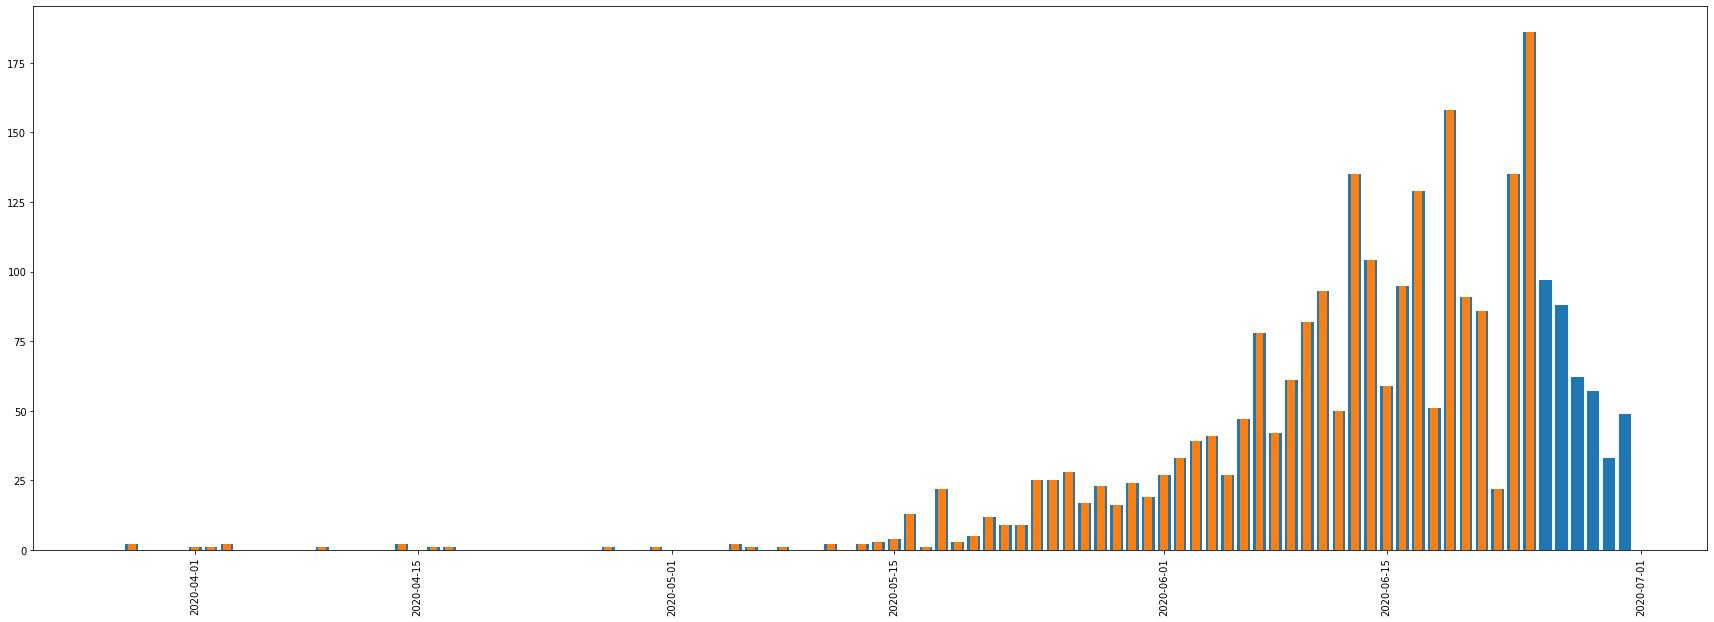

In [9]:
fig = plt.figure(1, figsize=(30,10))
plt.bar(df30['data'] , df30['casosNovos'], width = .8)
plt.bar(df24['data'] , df24['casosNovos'], width = .5)
plt.xticks(rotation=90) 

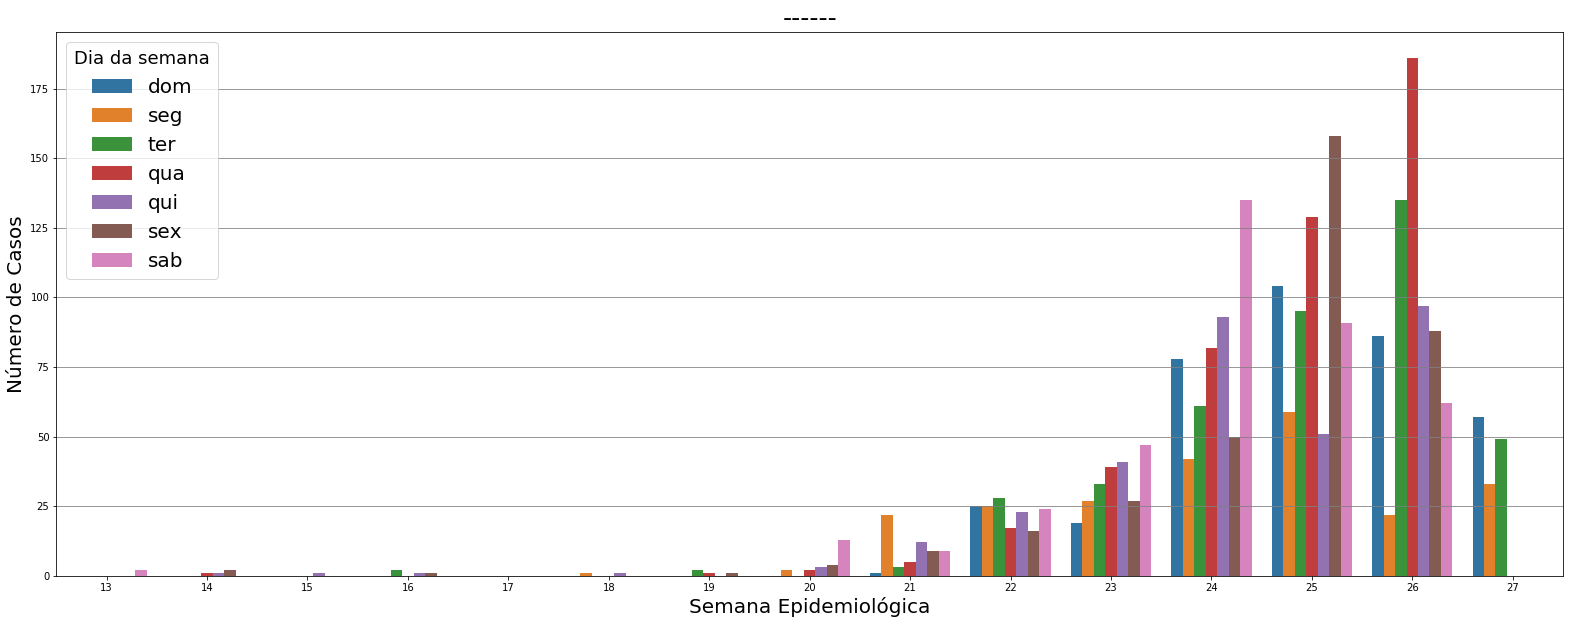

In [10]:
    fig = plt.figure(1, figsize=(df30['semanaEpi'].max(),10))
    sns.barplot(x='semanaEpi', y='casosNovos', hue="dia_semana_nm", data=df30,   dodge= True)
    #sns.barplot(x='semanaEpi', y='casosNovos', hue="dia_semana_nm", data=df24,   dodge= True)
    
    plt.title('------', fontsize=25)
    plt.xlabel('Semana Epidemiológica', fontsize=20)
    plt.ylabel('Número de Casos', fontsize=20)
    plt.grid(axis='y', color='grey')
    plt.rcParams['legend.title_fontsize'] = 18

    plt.legend(title='Dia da semana', loc='upper left', prop={'size': 20})

In [12]:
df30.tail(30)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,dia_semana,dia_semana_nm,CA_LOG
478054,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-01,23,222949,306,27,2,0,NaN,NaN,0.0,0,seg,2.485721
478055,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-02,23,222949,339,33,2,0,NaN,NaN,0.0,1,ter,2.530200
478056,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-03,23,222949,378,39,2,0,NaN,NaN,0.0,2,qua,2.577492
478057,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-04,23,222949,419,41,2,0,NaN,NaN,0.0,3,qui,2.622214
478058,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-05,23,222949,446,27,2,0,NaN,NaN,0.0,4,sex,2.649335
478059,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-06,23,222949,493,47,2,0,NaN,NaN,0.0,5,sab,2.692847
478060,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-07,24,222949,571,78,2,0,NaN,NaN,0.0,6,dom,2.756636
478061,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-08,24,222949,613,42,2,0,NaN,NaN,0.0,0,seg,2.787460
478062,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-09,24,222949,674,61,2,0,NaN,NaN,0.0,1,ter,2.828660
478063,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-06-10,24,222949,756,82,2,0,NaN,NaN,0.0,2,qua,2.878522
